# Image Background Subtraction

This file explores the method of background subtraction of plant leaf images captured from mobile camera. Background subtracted images will then be treated as input images to the plant leaf identification system.

### Importing necessary libraries

In [3]:
import os
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


%matplotlib inline

In [1]:
pwd

'/home/shivam-gupta/Desktop/CDMD Research Work'

### Reading the image

###### Note: 'mobile captures' folder must be in the project root

In [3]:
ds_path = "/home/shivam-gupta/Desktop/Dataset"
img_files = os.listdir(ds_path)
print(img_files)

['0a14783a-838a-4d4f-a671-ff98011714c6___FREC_Scab 3288.JPG', '0a6812de-7416-4ffe-aba9-307599a02c84___FREC_Scab 2973.JPG', '0b170906-9436-4c0d-84c1-c396ad9d909b___FREC_Scab 3101.JPG', '0b1e31fa-cbc0-41ed-9139-c794e6855e82___FREC_Scab 3089.JPG', '0b4a52e3-e15e-4117-b2e8-7cdb5dca3ce9___FREC_Scab 3137.JPG', '0c620ec5-11cf-4120-94ab-1311e99df147___FREC_Scab 3131.JPG', '0cbfa4fa-63d8-43ce-9385-ff140e524b69___FREC_Scab 3164.JPG', '0d3c0790-7833-470b-ac6e-94d0a3bf3e7c___FREC_Scab 2959.JPG', 'apple1.JPG', 'result.jpg', 'testingimage1.JPG']


In [ ]:
black_img = np.empty([800,800,3],dtype=np.uint8)
black_img.fill(0)

def find_contour(cnts):
    contains = []
    y_ri,x_ri, _ = resized_image.shape
    for cc in cnts:
        yn = cv2.pointPolygonTest(cc,(x_ri//2,y_ri//2),False)
        contains.append(yn)

    val = [contains.index(temp) for temp in contains if temp>0]
    print(contains)
    return val[0]
        

count=0
for file in img_files:
    #print(file)
    imgpath = ds_path + "\\" + file
    #print(imgpath)
    main_img = cv2.imread(imgpath)
    #print(main_img)
    #plt.imshow(main_img)
    resized_image = cv2.resize(main_img, (800, 800))
    #print(resized_image.shape)
    
    #path=cv2.imwrite("count"+str(count)+".jpg", resized_image)
    #count=count+1
    
    #plt.imshow(resized_image,cmap="Greys_r")
   # y,x,_ = img.shape
    gs = cv2.cvtColor(resized_image,cv2.COLOR_RGB2GRAY)
    
    #pat=cv2.imwrite("gs"+str(count)+".jpg", gs)
    #count=count+1
    #plt.imshow(gs,cmap="Greys_r")
    
    blur = cv2.GaussianBlur(gs, (55,55),0)
    #path=cv2.imwrite("count"+str(count)+".jpg", blur)
    #count=count+1
    
    #plt.imshow(blur,cmap="Greys_r")
    
    ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    #path=cv2.imwrite("count"+str(count)+".jpg",im_bw_otsu)
    #count=count+1
    
    #plt.imshow(im_bw_otsu,cmap='Greys_r')
    
    kernel = np.ones((50,50),np.uint8)
    closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
    #path=cv2.imwrite("count"+str(count)+".jpg", closing)
    #count=count+1
    
    #plt.imshow(closing,cmap="Greys_r")
    image, contours, hierarchy = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    print(len(contours))
    
    index = find_contour(contours)
    cnt = contours[index]
    print(cnt)
    mask = cv2.drawContours(black_img, [cnt] , 0, (255,255,255), -1)
    path=cv2.imwrite("count"+str(count)+".jpg",mask)
    count=count+1

### Resizing the image to (1600,1200) - Optional

This is done as all the images in the flavia dataset were of size (1600,1200)

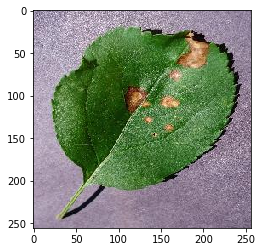

In [5]:
main_img = cv2.imread('leaf.jpg')
img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
plt.imshow(img,cmap="Greys_r")

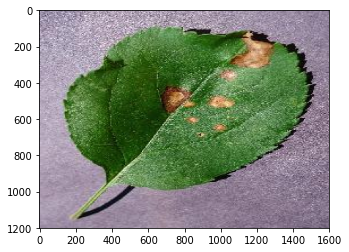

In [6]:
resized_image = cv2.resize(img, (1600, 1200))
plt.imshow(resized_image,cmap="Greys_r")

In [7]:
y,x,_ = img.shape

### Converting image to grayscale

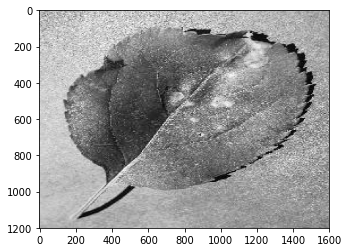

In [8]:
gs = cv2.cvtColor(resized_image,cv2.COLOR_RGB2GRAY)
plt.imshow(gs,cmap="Greys_r")

### Smoothing image using Guassian filter of size (55,55)

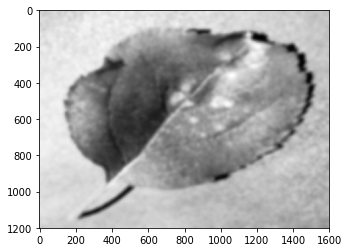

In [9]:
blur = cv2.GaussianBlur(gs, (55,55),0)
plt.imshow(blur,cmap="Greys_r")

### Adaptive image thresholding using Otsu's thresholding method

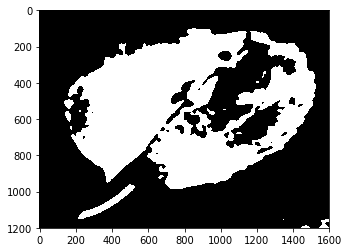

In [10]:
ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(im_bw_otsu,cmap='Greys_r')

### Closing of holes using Morphological Transformation

Performed so as to close any holes present in the leaf

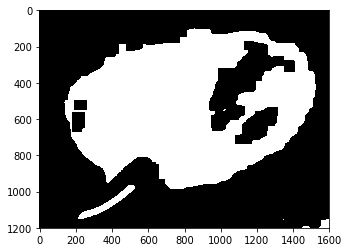

In [11]:
kernel = np.ones((50,50),np.uint8)
closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing,cmap="Greys_r")

### Finding contours

In [12]:
contours, hierarchy = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [13]:
len(contours)

10

### Finding the correct leaf contour from the list of contours

The following function finds the correct leaf contour by taking any coordinate point of the leaf (default - center point) and checks whether the current contour contains that point or not. Returns the index of the correct contour. 

In [14]:
def find_contour(cnts):
    contains = []
    y_ri,x_ri, _ = resized_image.shape
    for cc in cnts:
        yn = cv2.pointPolygonTest(cc,(x_ri//2,y_ri//2),False)
        contains.append(yn)

    val = [contains.index(temp) for temp in contains if temp>0]
    print(contains)
    return val[0]

### Creating mask image for background subtraction using leaf contour

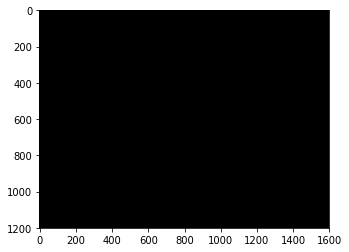

In [15]:
black_img = np.empty([1200,1600,3],dtype=np.uint8)
black_img.fill(0)
plt.imshow(black_img,cmap="Greys_r")

[-1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0]


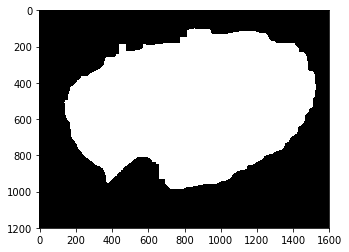

In [16]:
index = find_contour(contours)
cnt = contours[index]
mask = cv2.drawContours(black_img, [cnt] , 0, (255,255,255), -1)
plt.imshow(mask)

### Performing masking operation on the original image 

In [17]:
maskedImg = cv2.bitwise_and(resized_image, mask)

In [18]:
white_pix = [255,255,255]
black_pix = [0,0,0]

final_img = maskedImg
h,w,channels = final_img.shape
for x in range(0,w):
    for y in range(0,h):
        channels_xy = final_img[y,x]
        if all(channels_xy == black_pix):    
            final_img[y,x] = white_pix

### Background subtracted image

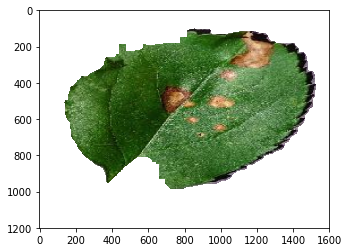

In [19]:
plt.imshow(final_img)

In [20]:
path=cv2.imwrite("result.jpg", final_img)